# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

In [5]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
#from scipy.sparse import csr_matrix
import scipy.special as sps

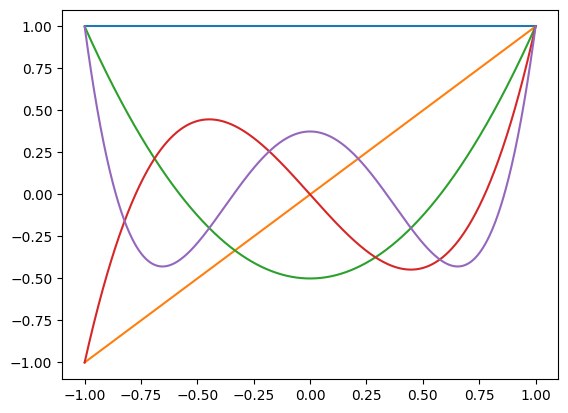

In [6]:
x = np.linspace(-1, 1, 1000)
fig, axes = plt.subplots()
for i in range(5):
    axes.plot(x, (sps.legendre(i))(x))

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
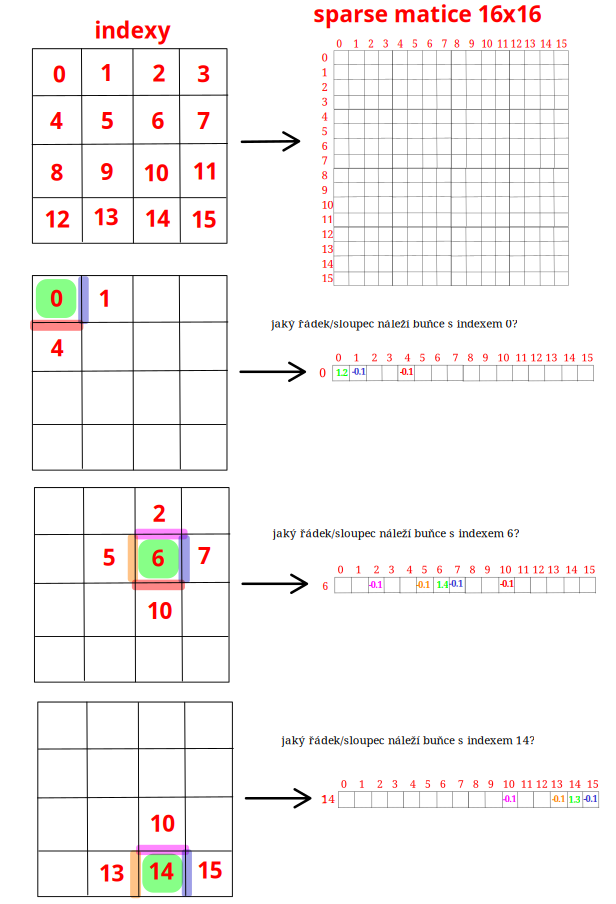


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [7]:
import scipy.sparse as sparse
n = 3
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))

for i in range(n): #radky
    for j in range(n): #sloupce
        # TODO fill matrix A - diagonal and non-diagonal elements
        A[i*n+j,i*n+j] += 1 # diagogála = 1
        # horní trojúhelník
        if i != n-1:
            A[i*n+j,i*n+j+n] = -epsilon
            A[i*n+j,i*n+j] += epsilon # +0.1 na diag
        if j != n-1:
            A[i*n+j,i*n+j+1] = -epsilon
            A[i*n+j,i*n+j] += epsilon # +0.1 na diag 
        # dolní trojúhelník
        if i != 0:
            A[i*n+j,i*n+j-n] = -epsilon
            A[i*n+j,i*n+j] += epsilon # +0.1 na diag
        if j != 0:
            A[i*n+j,i*n+j-1] = -epsilon
            A[i*n+j,i*n+j] += epsilon # +0.1 na diag

print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [8]:
n = 4
index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten()
index_matrix_vertical

array([ 0,  4,  8, 12,  1,  5,  9, 13,  2,  6, 10, 14,  3,  7, 11, 15])

In [9]:
np.arange(n*n)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [22]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix


def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx =  np.arange(n*n-n) # TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = np.arange(n, n*n) # TODO - vytvořte indexy buněk pod hranou
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_low_idx)) # TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = np.hstack((horizontal_low_idx, horizontal_up_idx)) # TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = index_matrix_vertical[0:(n*n-n)]# TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = index_matrix_vertical[n:n*n]# TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = np.hstack((vertical_left_idx, vertical_right_idx)) # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = np.hstack((vertical_right_idx, vertical_left_idx)) # TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    data_diag[::n] -= epsilon # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    data_diag[n-1::n] -= epsilon # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    data_diag[:n] -= epsilon # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    data_diag[-n:] -= epsilon # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data,(row,col)), shape=(n*n, n*n)) # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců
   
    return A_efficiently


In [23]:
n = 3
epsilon = 0.1
A_efficiently(n, epsilon).todense()

matrix([[ 1.2, -0.1,  0. , -0.1,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.1,  1.3, -0.1,  0. , -0.1,  0. ,  0. ,  0. ,  0. ],
        [ 0. , -0.1,  1.2,  0. ,  0. , -0.1,  0. ,  0. ,  0. ],
        [-0.1,  0. ,  0. ,  1.3, -0.1,  0. , -0.1,  0. ,  0. ],
        [ 0. , -0.1,  0. , -0.1,  1.4, -0.1,  0. , -0.1,  0. ],
        [ 0. ,  0. , -0.1,  0. , -0.1,  1.3,  0. ,  0. , -0.1],
        [ 0. ,  0. ,  0. , -0.1,  0. ,  0. ,  1.2, -0.1,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -0.1,  0. , -0.1,  1.3, -0.1],
        [ 0. ,  0. ,  0. ,  0. ,  0. , -0.1,  0. , -0.1,  1.2]])

4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

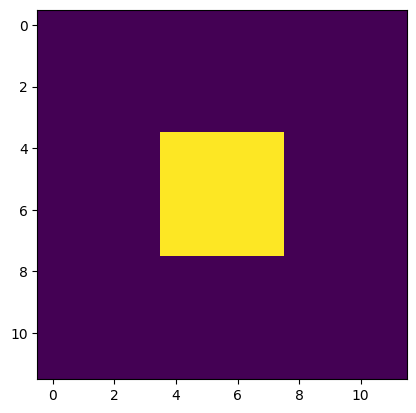

In [27]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

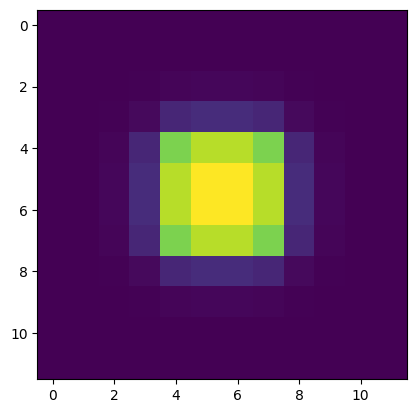

In [28]:
import scipy as sp
plt.imshow(sp.sparse.linalg.spsolve(A,b).reshape(n,n))
# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek


Vlastní vektory matice:
(array([2.57274066+0.j, 2.49282032+0.j, 2.53278049+0.j, 2.53278049+0.j,
       2.46921304+0.j, 2.46921304+0.j]), array([[-0.00283951+0.j,  0.01116455+0.j,  0.00446173+0.j,
         0.00660519+0.j,  0.01131278+0.j,  0.00323914+0.j],
       [ 0.00832504+0.j, -0.03050212+0.j, -0.01329427+0.j,
        -0.01826133+0.j, -0.02939547+0.j, -0.0115879 +0.j],
       [-0.01324322+0.j,  0.04166667+0.j,  0.02180313+0.j,
         0.02565649+0.j,  0.03636862+0.j,  0.02419564+0.j],
       [ 0.0172589 +0.j, -0.04166667+0.j, -0.02962156+0.j,
        -0.02718261+0.j, -0.03175705+0.j, -0.04020317+0.j],
       [-0.02009841+0.j,  0.03050212+0.j,  0.03621677+0.j,
         0.02273567+0.j,  0.02120934+0.j,  0.05556214+0.j],
       [ 0.02156825+0.j, -0.01116455+0.j, -0.04092616+0.j,
        -0.01372284+0.j, -0.01298819+0.j, -0.06504342+0.j],
       [-0.02156825+0.j, -0.01116455+0.j,  0.04305963+0.j,
         0.00267071+0.j,  0.01298819+0.j,  0.06504342+0.j],
       [ 0.02009841+0.j,  0.03

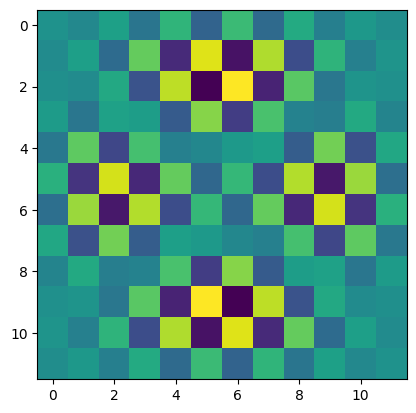

In [43]:
# Spočítáme vlastní hodnoty a vektory
vectors = sp.sparse.linalg.eigs(A)

# Výpis vlastních hodnot a vlastních vektorů
print("Vlastní vektory matice:")
print(vectors)
plt.figure()
for i in range(len(vectors[1][1,:])):
    vektory = vectors[1][:,i]
    plt.imshow(vektory.reshape(n,n).real)
# TODO - spočtěte a vykreslete vlastní vektory matice A

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [40]:
L = np.roots(sps.legendre(5))
print(L)

[-0.90617985 -0.53846931  0.90617985  0.53846931  0.        ]


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [10]:
import sympy as sym

x = sym.Symbol('x')
legendre_5 = sym.legendre(5, x)
legendre_5

63*x**5/8 - 35*x**3/4 + 15*x/8

In [48]:
A = []
a = sym.solvers.solve(legendre_5,x)

for i in a:
    b = i.evalf()
    A.append(b)

print(L)
print(A)

LS = sorted(L)
AS = sorted(A)
print("seřazené A:", AS)
print("seřazené L:", LS)

rozdil = []
for i in range(len(AS)):
    rozdil.append(AS[i] - LS[i])
print("rodíl mezi A a L:", rozdil)

[-0.90617985 -0.53846931  0.90617985  0.53846931  0.        ]
[0, -0.538469310105683, 0.538469310105683, -0.906179845938664, 0.906179845938664]
seřazené A: [-0.906179845938664, -0.538469310105683, 0, 0.538469310105683, 0.906179845938664]
seřazené L: [-0.9061798459386643, -0.5384693101056833, 0.0, 0.5384693101056831, 0.9061798459386635]
rodíl mezi A a L: [3.33066907387547e-16, 2.22044604925031e-16, 0, 0, 4.44089209850063e-16]
